## Logistic Regression
In this notebook you will use your knowledge of the mathematics of logistic regression to write a program to solve for the logistic parameters given a training dataset. 

The necessary math is in question #4, homework #4.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Load the modified Iris dataset

In [ ]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1).astype(np.float) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 
Y[Y==0] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  -1. ]

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [ ]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]


X_train = X_shuffled[:100][:,[3,1]] # Shape: (100,2)
X_train = np.delete(X_train, 42, axis=0) # Remove a point for separability.
Y_train = Y_shuffled[:100]          # Shape: (100,)
Y_train = np.delete(Y_train, 42, axis=0) # Remove a point for separability.
X_test = X_shuffled[100:][:,[3,1]]  # Shape: (50,2)
Y_test = Y_shuffled[100:]           # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(99, 2)
(99,)
(50, 2)
(50,)


### Visualization

In [ ]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == -1).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1], 
                c='blue', label='negative class')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1], 
                c='red', label='positive class')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

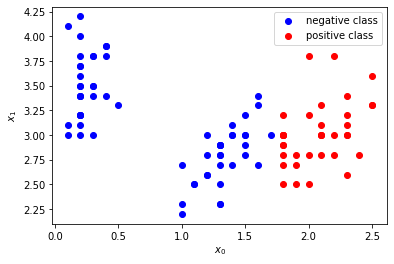

In [ ]:
# Visualize training set.
vis(X_train, Y_train)

### Logistic Regression Using Gradient Descent

In this problem, we would like to use the gradient descent to calculate the parameters $\mathbf{w},b$ for a logistic regression model.
If we have the loss function $\mathcal{L}(\mathbf{w},b)$, then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters $\mathbf{w}$, $b$.

for i = 1 to #iterations:

- **Step 2**. Compute the partial derivatives $\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial \mathbf{w}}$, $\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial b}$.

- **Step 3**. Update the parameters 
$$\mathbf{w} \leftarrow \mathbf{w} - \eta \frac{\partial \mathcal{L}(\mathbf{w}, b)}{\partial \mathbf{w}}, \quad\quad b \leftarrow b - \eta \frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial b}$$
where $\eta$ is the learning rate.

Note that in the code, we use `W` and `b` to represent the weight vector $\mathbf{w}$ and bias scalar $b$.

In [ ]:
# Sigmoid function: sigmoid(z) = 1/(1 + e^(-z))
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [ ]:
# Judge function: 1(a != b).
def judge(a, b):
    ####### To be filled #######
    
# Logistic regression classifier.
def f_logistic(x, W, b):
    # x should be a 2-dimensional vector, 
    # W should be a 2-dimensional vector,
    # b should be a scalar.
    # you should return a scalar which is -1 or 1.
    ####### To be filled #######  Hint: use sigmoid() function.
    
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, W, b):
    ############ To be filled. ############
    
    for (xi, yi) in zip(X, Y):
        ############ To be filled. ############
        # Hint: Use judge() and f_logistic()
    
    ############ To be filled. ############
    return ############ To be filled. ############

In [4]:
# Gradient of L(W, b) with respect to W and b.
def grad_L_W_b(X, Y, W, b):
    ####### To be filled #######
    
    grad_W = ####### To be filled #######
    grad_b = ####### To be filled #######
    return grad_W, grad_b

SyntaxError: invalid syntax (<ipython-input-4-3a840cf3a644>, line 6)

In [ ]:
# Loss L(W, b).
def L_W_b(X, Y, W, b):
    # You should return a scalar.
    
    ####### To be filled #######
    return ####### To be filled #######

In [ ]:
# Some settings.
learning_rate = 0.001
iterations    = 10000
losses = []

# Gradient descent algorithm for logistic regression.
# Step 1. Initialize the parameters W, b.
W = np.zeros(2) 
b = 0

for i in range(iterations):
    # Step 2. Compute the partial derivatives.
    grad_W, grad_b = grad_L_W_b(X_train, Y_train, W, b)
    # Step 3. Update the parameters.
    ####### To be filled #######   # Update W.
    ####### To be filled #######   # Update b.

    # Track the training losses.
    losses.append(L_W_b(X_train, Y_train, W, b))

### Visualize the results

In [ ]:
# Show decision boundary, training error and test error.
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
vis(X_train, Y_train, W, b)
print('Training error: {}'.format(calc_error(X_train, Y_train, W, b)))
vis(X_test, Y_test, W, b)
print('Test error: {}'.format(calc_error(X_test, Y_test, W, b)))

In [ ]:
# Plot training loss curve.
plt.title('Training loss curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(losses)
plt.show()